In [1]:
import nfl_data_py as nfl
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = nfl.import_seasonal_data([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
nfl_df = df.drop(df[df.passing_yards < 1000].index)

In [4]:
pd.set_option('display.max_rows', 20)
nfl_df.reset_index(drop=True, inplace=True)

In [5]:
nfl_df.head()

,player_id,season,season_type,player_name,player_display_name,position,position_group,headshot_url,opponent_team,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr,dakota,carries,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa,rushing_2pt_conversions,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr_x,special_teams_tds,fantasy_points,fantasy_points_ppr,games,tgt_sh,ay_sh,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh
0,00-0000104,1999,REG,0,Troy AikmanTroy AikmanTroy AikmanTroy AikmanTr...,QBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQB,0,WASATLARIPHINYGWASINDMINMIANEPHINYJNONYG,258,430,2920.0,17,11.0,19.0,130.0,5,1,0.0,0.0,124.0,36.244714,0,0.0,1.326212,21,10.0,1,2.0,0.0,3.0,-8.846873,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,167.80,167.80,14,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155333
1,00-0000104,2000,REG,0,Troy AikmanTroy AikmanTroy AikmanTroy AikmanTr...,QBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQB,0,PHISFCARNYGARIJAXCINBALMINTBWAS,153,259,1616.0,7,14.0,13.0,91.0,2,2,0.0,0.0,81.0,-29.087924,1,0.0,0.995403,10,13.0,0,0.0,0.0,5.0,-2.118868,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,63.94,63.94,11,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087728
2,00-0000722,1999,REG,0,Tony BanksTony BanksTony BanksTony BanksTony B...,QBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQB,0,KCBUFCLEJAXCINJAXTENPITNOCINNE,167,318,2093.0,16,8.0,33.0,190.0,9,5,0.0,0.0,92.0,-31.461388,0,0.0,0.895404,24,93.0,0,2.0,1.0,8.0,-5.022200,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,129.02,129.02,11,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160397
3,00-0000722,2000,REG,0,Tony BanksTony BanksTony BanksTony BanksTony B...,QBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQB,0,PITJAXMIACINCLEJAXWASTENDALCLENYJ,148,272,1538.0,8,8.0,20.0,152.0,4,0,0.0,0.0,82.0,-17.397079,1,0.0,0.506394,19,57.0,0,1.0,0.0,3.0,-11.114759,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,85.22,85.22,11,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107349
4,00-0000722,2001,REG,0,Tony BanksTony BanksTony BanksTony BanksTony B...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,0,LACKCNYGDALCARNYGSEADENPHIDALARIPHICHINOARI,198,370,2386.0,10,10.0,29.0,173.0,2,2,0.0,0.0,106.0,-38.900602,1,0.0,0.990532,47,152.0,2,8.0,2.0,7.0,-9.998593,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,136.64,136.64,15,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146349


In [6]:
nfl_df = nfl_df.sort_values(by=['player_id', 'season'])
nfl_df['TargetTD'] = nfl_df.groupby('player_id')['passing_tds'].shift(-1) #Shifts passing touchdowns backwards to track previous TD's thrown in last game

In [7]:
checking_columns = ['passing_tds', 'player_id', 'TargetTD']
nfl_df[checking_columns].head(10)

,passing_tds,player_id,TargetTD
0,17,00-0000104,7.0
1,7,00-0000104,NaN
2,16,00-0000722,8.0
3,8,00-0000722,10.0
4,10,00-0000722,NaN
5,13,00-0000865,13.0
6,13,00-0000865,12.0
7,12,00-0000865,NaN
8,36,00-0001218,19.0
9,19,00-0001218,NaN


In [8]:
nfl_df = nfl_df.dropna() #Drops all cells with missing values

In [9]:
nfl_df.dropna(subset=['TargetTD'], inplace=True)

In [10]:
X = nfl_df.drop(['TargetTD'], axis=1) #X becomes the training X data, and the TargetTD col. is the training y data

In [11]:
X.dropna()
X.columns

Index(['player_id', 'season', 'season_type', 'player_name',
       'player_display_name', 'position', 'position_group', 'headshot_url',
       'opponent_team', 'completions', 'attempts', 'passing_yards',
       'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
       'racr', 'target_share', 'air_yards_share', 'wopr_x',
       'special_teams_tds', 'fantasy_points', 'fantasy_points_pp

In [12]:
columns_to_remove = ['player_name','player_display_name','position','position_group','player_id','season','season_type','headshot_url','opponent_team' ]
X = X.drop(columns = columns_to_remove) #Removes all categorical data from entire dataset

In [13]:
X.head(5)

,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr,dakota,carries,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa,rushing_2pt_conversions,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr_x,special_teams_tds,fantasy_points,fantasy_points_ppr,games,tgt_sh,ay_sh,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh
47,243,416,2681.0,12,7.0,8.0,60.0,3,1,3593.0,1166.0,133.0,28.330680,1,44.136614,1.048541,25,49.0,0,2.0,0.0,4.0,-8.145980,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,146.14,146.14,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127691
48,119,216,1225.0,6,8.0,5.0,37.0,0,0,1742.0,558.0,63.0,-16.915560,0,5.128613,0.257110,12,15.0,1,3.0,2.0,2.0,-5.847749,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,60.50,60.50,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123449
66,263,431,2805.0,17,11.0,22.0,167.0,6,4,3424.0,1310.0,128.0,-1.619628,0,11.100126,1.138353,18,12.0,0,0.0,0.0,2.0,-5.880104,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,151.40,151.40,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156648
67,246,414,3284.0,15,12.0,20.0,130.0,3,2,3882.0,1226.0,151.0,38.618376,0,14.273920,1.955248,20,21.0,2,1.0,1.0,2.0,-9.217087,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,175.46,175.46,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140406
82,343,613,3885.0,18,18.0,21.0,139.0,7,4,5305.0,1928.0,182.0,-2.583343,0,12.682606,0.924091,23,28.0,1,1.0,1.0,4.0,-33.554505,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,190.20,190.20,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152798


In [14]:
X.dropna()
X.to_csv('trainx.csv')

In [15]:
y = nfl_df['TargetTD'] #Creates Training Y Data from TargetTD Column
y.to_csv('trainy.csv')

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
selector = SelectKBest(score_func=f_regression, k=15)

In [17]:
selector.fit(X, y) #Feature selector reduces chance of overfitting by isolating the 15 most influential independent variables (features).

SelectKBest(k=15, score_func=<function f_regression at 0x0000024CAD5094E0>)

In [18]:
top_feature_indices = selector.get_support(indices=True)

In [19]:
top_feature_names = X.columns[top_feature_indices]

In [20]:
print("Top", 15, "features:")
featurelist = []
for feature, score in zip(top_feature_names, selector.scores_[top_feature_indices]):
    print(feature, ":", score)
    
    featurelist.append(feature)

Top 15 features:
completions : 108.07049010871867
attempts : 84.14523693412944
passing_yards : 124.745864006256
passing_tds : 155.70979250854947
passing_air_yards : 83.1804581418475
passing_yards_after_catch : 108.35804053912119
passing_first_downs : 123.16625084393536
passing_epa : 127.42396981152852
passing_2pt_conversions : 7.967734062823358
pacr : 41.825608466542775
dakota : 129.34209055605072
fantasy_points : 140.8765462398875
fantasy_points_ppr : 140.72835613695585
games : 47.46300174652704
ppr_sh : 62.311716940137586


In [21]:
featurelist

['completions',
 'attempts',
 'passing_yards',
 'passing_tds',
 'passing_air_yards',
 'passing_yards_after_catch',
 'passing_first_downs',
 'passing_epa',
 'passing_2pt_conversions',
 'pacr',
 'dakota',
 'fantasy_points',
 'fantasy_points_ppr',
 'games',
 'ppr_sh']

In [22]:
TrainX = X[featurelist]

In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [24]:
test_x = X[featurelist]

In [25]:
test_x.head()


,completions,attempts,passing_yards,passing_tds,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr,dakota,fantasy_points,fantasy_points_ppr,games,ppr_sh
47,243,416,2681.0,12,3593.0,1166.0,133.0,28.330680,1,44.136614,1.048541,146.14,146.14,16,0.127691
48,119,216,1225.0,6,1742.0,558.0,63.0,-16.915560,0,5.128613,0.257110,60.50,60.50,7,0.123449
66,263,431,2805.0,17,3424.0,1310.0,128.0,-1.619628,0,11.100126,1.138353,151.40,151.40,13,0.156648
67,246,414,3284.0,15,3882.0,1226.0,151.0,38.618376,0,14.273920,1.955248,175.46,175.46,16,0.140406
82,343,613,3885.0,18,5305.0,1928.0,182.0,-2.583343,0,12.682606,0.924091,190.20,190.20,16,0.152798


In [26]:
test = nfl.import_seasonal_data([2021,2022])
test_df = test.drop(test[test.passing_yards < 1000].index) #Only measuring QB's who threw more than 1000 passign yards
test_df.head()

,player_id,season,season_type,player_name,player_display_name,position,position_group,headshot_url,opponent_team,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr,dakota,carries,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa,rushing_2pt_conversions,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr_x,special_teams_tds,fantasy_points,fantasy_points_ppr,games,tgt_sh,ay_sh,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh
0,00-0019596,2021,REG,T.BradyT.BradyT.BradyT.BradyT.BradyT.BradyT.Br...,Tom BradyTom BradyTom BradyTom BradyTom BradyT...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,DALATLLANEMIAPHICHINOWASNYGINDATLBUFNOCARNYJCAR,485,719,5316.0,43,12.0,22.0,144.0,3,2,5821.0,2534.0,269.0,145.714884,0,15.932075,2.460440,28,81.0,2,1.0,1.0,14.0,3.850479,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.0,374.74,374.74,17,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.195705
1,00-0019596,2022,REG,T.BradyT.BradyT.BradyT.BradyT.BradyT.BradyT.Br...,Tom BradyTom BradyTom BradyTom BradyTom BradyT...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,DALNOGBKCATLPITCARBALLASEACLENOSFCINARICARATL,490,733,4694.0,25,9.0,22.0,160.0,3,2,5027.0,2292.0,237.0,61.906270,2,16.329448,1.556584,29,-1.0,1,2.0,2.0,5.0,-20.469321,0,0,1,0.0,0,0.0,0.0,16.0,0.0,0.0,-4.726016,0,0.0,0.034483,0.061303,0.094636,0.0,271.66,271.66,17,0.001332,0.00310,0.0,0.004477,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.175012
4,00-0022924,2021,REG,B.RoethlisbergerB.RoethlisbergerB.Roethlisberg...,Ben RoethlisbergerBen RoethlisbergerBen Roethl...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,BUFLVCINGBDENSEACLECHILACCINBALMINTENKCCLEBAL,390,605,3740.0,22,10.0,38.0,239.0,11,5,4055.0,1932.0,188.0,-44.582553,2,15.447406,0.935811,20,5.0,1,0.0,0.0,3.0,-1.979403,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.0,218.10,218.10,16,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.164071
5,00-0023459,2021,REG,A.RodgersA.RodgersA.RodgersA.RodgersA.RodgersA...,Aaron RodgersAaron RodgersAaron RodgersAaron R...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,NODETSFPITCINCHIWASARISEAMINLACHIBALCLEMINDET,366,531,4115.0,37,4.0,30.0,188.0,1,0,4078.0,2189.0,213.0,129.766062,0,16.839913,2.846853,33,101.0,3,2.0,0.0,10.0,5.831224,0,1,1,-4.0,0,0.0,0.0,-4.0,0.0,0.0,-1.243446,0,0.0,0.032258,-0.011299,0.040477,0.0,332.30,333.30,16,0.001789,-0.00093,0.0,0.001939,-0.000923,0.0,0.0,0.0,-0.000461,-0.000738,-0.007156,0.207297
6,00-0023459,2022,REG,A.RodgersA.RodgersA.RodgersA.RodgersA.RodgersA...,Aaron RodgersAaron RodgersAaron RodgersAaron R...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,MINCHITBNENYGNYJWASBUFDETDALTENPHICHILAMIAMINDET,350,542,3695.0,26,12.0,32.0,258.0,4,2,4327.0,1893.0,177.0,-6.309946,2,16.405610,1.502478,34,94.0,1,2.0,2.0,9.0,-7.814974,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.0,239.20,239.20,17,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.166585


In [27]:
test_df = test_df.sort_values(by=['player_id', 'season'])
test_df['TargetTD'] = test_df.groupby('player_id')['passing_tds'].shift(-1) #Same TargetTD Column as Training Dataset
test_df.head()

,player_id,season,season_type,player_name,player_display_name,position,position_group,headshot_url,opponent_team,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr,dakota,carries,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa,rushing_2pt_conversions,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr_x,special_teams_tds,fantasy_points,fantasy_points_ppr,games,tgt_sh,ay_sh,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh,TargetTD
0,00-0019596,2021,REG,T.BradyT.BradyT.BradyT.BradyT.BradyT.BradyT.Br...,Tom BradyTom BradyTom BradyTom BradyTom BradyT...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,DALATLLANEMIAPHICHINOWASNYGINDATLBUFNOCARNYJCAR,485,719,5316.0,43,12.0,22.0,144.0,3,2,5821.0,2534.0,269.0,145.714884,0,15.932075,2.460440,28,81.0,2,1.0,1.0,14.0,3.850479,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.0,374.74,374.74,17,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.195705,25.0
1,00-0019596,2022,REG,T.BradyT.BradyT.BradyT.BradyT.BradyT.BradyT.Br...,Tom BradyTom BradyTom BradyTom BradyTom BradyT...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,DALNOGBKCATLPITCARBALLASEACLENOSFCINARICARATL,490,733,4694.0,25,9.0,22.0,160.0,3,2,5027.0,2292.0,237.0,61.906270,2,16.329448,1.556584,29,-1.0,1,2.0,2.0,5.0,-20.469321,0,0,1,0.0,0,0.0,0.0,16.0,0.0,0.0,-4.726016,0,0.0,0.034483,0.061303,0.094636,0.0,271.66,271.66,17,0.001332,0.00310,0.0,0.004477,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.175012,NaN
4,00-0022924,2021,REG,B.RoethlisbergerB.RoethlisbergerB.Roethlisberg...,Ben RoethlisbergerBen RoethlisbergerBen Roethl...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,BUFLVCINGBDENSEACLECHILACCINBALMINTENKCCLEBAL,390,605,3740.0,22,10.0,38.0,239.0,11,5,4055.0,1932.0,188.0,-44.582553,2,15.447406,0.935811,20,5.0,1,0.0,0.0,3.0,-1.979403,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.0,218.10,218.10,16,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.164071,NaN
5,00-0023459,2021,REG,A.RodgersA.RodgersA.RodgersA.RodgersA.RodgersA...,Aaron RodgersAaron RodgersAaron RodgersAaron R...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,NODETSFPITCINCHIWASARISEAMINLACHIBALCLEMINDET,366,531,4115.0,37,4.0,30.0,188.0,1,0,4078.0,2189.0,213.0,129.766062,0,16.839913,2.846853,33,101.0,3,2.0,0.0,10.0,5.831224,0,1,1,-4.0,0,0.0,0.0,-4.0,0.0,0.0,-1.243446,0,0.0,0.032258,-0.011299,0.040477,0.0,332.30,333.30,16,0.001789,-0.00093,0.0,0.001939,-0.000923,0.0,0.0,0.0,-0.000461,-0.000738,-0.007156,0.207297,26.0
6,00-0023459,2022,REG,A.RodgersA.RodgersA.RodgersA.RodgersA.RodgersA...,Aaron RodgersAaron RodgersAaron RodgersAaron R...,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,QBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQBQB,https://static.www.nfl.com/image/private/f_aut...,MINCHITBNENYGNYJWASBUFDETDALTENPHICHILAMIAMINDET,350,542,3695.0,26,12.0,32.0,258.0,4,2,4327.0,1893.0,177.0,-6.309946,2,16.405610,1.502478,34,94.0,1,2.0,2.0,9.0,-7.814974,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.0,239.20,239.20,17,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.166585,NaN


In [28]:
test_df.dropna(subset=['TargetTD'], inplace=True)

In [29]:
Test_Y = test_df['TargetTD']
Test_Y.to_csv('actual.csv')

In [30]:
Test_X = test_df
Test_X.to_csv('testx.csv')

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
Real_Test_X = Test_X[featurelist] #Creates a copy using the same 15 features selected from the training set

In [33]:
#Ridge Regression
RidgeReg = Ridge()  #default 59.13(best)
RidgeReg.fit(TrainX,y)
preds = RidgeReg.predict(Real_Test_X)
mse = mean_squared_error(Test_Y, preds)
mse

55.57134749995038

In [34]:
ap = 70000
mse_list = []
for i in range(20000):
    RidgeReg = Ridge(alpha = ap)  
    RidgeReg.fit(TrainX,y) 
    preds = RidgeReg.predict(Real_Test_X) 
    mse = mean_squared_error(Test_Y, preds) 
    to_append = [mse,i,ap]
    mse_list.append(to_append)
    ap+=1
#A for loop to parameter tune different weights within ridge regression

In [35]:
mse_list
sorted_list = sorted(mse_list, key=lambda x: x[0])

In [36]:
k = 1
result = []
for i in range(50):
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    top_feature_indices = selector.get_support(indices=True)
    top_feature_names = X.columns[top_feature_indices]
    #print("Top", 15, "features:")
    featurelist = []
    for feature, score in zip(top_feature_names, selector.scores_[top_feature_indices]):
        #print(feature, ":", score)
        
        featurelist.append(feature)
    TrainX = X[featurelist]
    RidgeReg = Ridge(alpha = 70000)  
    RidgeReg.fit(TrainX,y)
    Actual_Test_X = Test_X[featurelist]
    preds = RidgeReg.predict(Actual_Test_X)
    
    mse = mean_squared_error(Test_Y, preds)
    instance = [mse,i+1]
    result.append(instance)
    k+=1
result

[[60.05977948750469, 1],
 [58.551231276796734, 2],
 [58.72099054937839, 3],
 [58.716072040935025, 4],
 [53.730685546628436, 5],
 [53.73192162463024, 6],
 [53.657738549727746, 7],
 [53.67851761245774, 8],
 [53.71022644443265, 9],
 [54.400876839593984, 10],
 [53.7314974528147, 11],
 [53.73149557712187, 12],
 [53.694000185438654, 13],
 [53.619698913712206, 14],
 [53.620543167576706, 15],
 [53.62231726238504, 16],
 [53.62216801203055, 17],
 [53.62216761035545, 18],
 [53.48079021886843, 19],
 [53.51562691958379, 20],
 [53.515626806856496, 21],
 [53.66282285112706, 22],
 [53.66282282070743, 23],
 [53.60535772838205, 24],
 [54.41463612844687, 25],
 [54.41779011635184, 26],
 [54.39357711613862, 27],
 [54.393806624061504, 28],
 [54.373906829918944, 29],
 [54.37415810583614, 30],
 [54.37415813571079, 31],
 [54.32259759203521, 32],
 [54.25538127671425, 33],
 [54.25538122578448, 34],
 [54.25538122747777, 35],
 [54.255500275449954, 36],
 [54.255427240126835, 37],
 [54.25542722901758, 38],
 [54.2554

In [37]:
#Lasso Regression
LassoReg = Lasso(alpha =1)  #default 55.40(best)
LassoReg.fit(TrainX,y)
Actual_Test_X = Test_X[featurelist]
preds = LassoReg.predict(Actual_Test_X)
mse = mean_squared_error(Test_Y, preds)
mse

56.90495407260243

In [38]:
k = 1
result = []
for i in range(50):
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    top_feature_indices = selector.get_support(indices=True)
    top_feature_names = X.columns[top_feature_indices]
    #print("Top", 15, "features:")
    featurelist = []
    for feature, score in zip(top_feature_names, selector.scores_[top_feature_indices]):
        #print(feature, ":", score)
        
        featurelist.append(feature)
    TrainX = X[featurelist]
    LassoReg = Lasso()  
    LassoReg.fit(TrainX,y)
    Actual_Test_X = Test_X[featurelist]
    preds = LassoReg.predict(Actual_Test_X)
    mse = mean_squared_error(Test_Y, preds)
    instance = [mse,i+1]
    result.append(instance)
    k+=1

In [39]:
result

[[58.70439245315869, 1],
 [58.081476207306416, 2],
 [58.081476207306416, 3],
 [58.08147620730641, 4],
 [54.522446345412845, 5],
 [54.32614185791151, 6],
 [54.32630773595112, 7],
 [54.38571622659445, 8],
 [54.72718335539905, 9],
 [55.736981857948315, 10],
 [56.640451613335514, 11],
 [56.640451613335514, 12],
 [55.76845472497803, 13],
 [54.970573499222965, 14],
 [54.970573499222965, 15],
 [54.970580550393194, 16],
 [54.970580550393194, 17],
 [54.970580550393194, 18],
 [55.0090087301647, 19],
 [55.111891024312584, 20],
 [55.111891024312584, 21],
 [55.11189179713369, 22],
 [55.11189179713369, 23],
 [55.1118917971337, 24],
 [56.2407594603661, 25],
 [56.2407594603661, 26],
 [56.24076114660342, 27],
 [56.130082612884436, 28],
 [56.13008261288444, 29],
 [56.13008261288444, 30],
 [56.130082612884436, 31],
 [56.129756381992266, 32],
 [56.12975667952833, 33],
 [56.12975667952833, 34],
 [56.12975667952833, 35],
 [56.12975667952833, 36],
 [56.12975667952833, 37],
 [56.12975667952833, 38],
 [56.1297

<Axes: ylabel='TargetTD'>

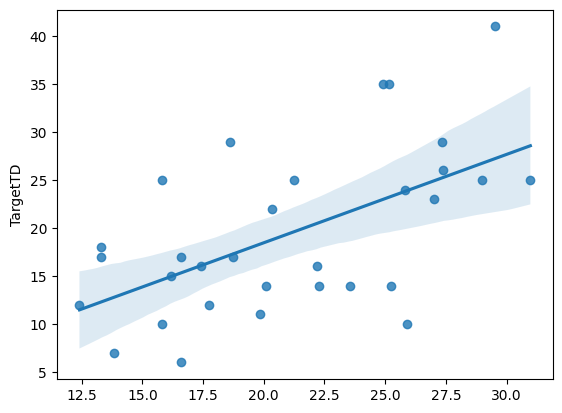

In [40]:
#Random Forest Regression
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150],           # Try different numbers of trees
    'max_depth': [5, 10, 15],                 # Try different max depths
    'min_samples_split': [2, 5, 10],          # Try different min samples to split
    'min_samples_leaf': [1, 2, 4],            # Try different min samples at leaf
    'max_features': [None, 'sqrt', 'log2']    # Try different max features
}
RandomReg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(RandomReg, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(TrainX, y)
best_rf_model = grid_search.best_estimator_
Actual_Test_X = Test_X[featurelist]
y_pred = best_rf_model.predict(Actual_Test_X)
RandomReg.fit(TrainX,y)
mse = mean_squared_error(Test_Y, y_pred)  #Got 52.4415 both times -- pretty good
import seaborn as sns
sns.regplot(x = y_pred, y = Test_Y)


In [41]:
mse

50.84995343374691

In [43]:
#Gradient Boosting Regression
GBReg = GradientBoostingRegressor()  
GBReg.fit(TrainX,y)
preds = GBReg.predict(Actual_Test_X)
mse = mean_squared_error(Test_Y, preds)
mse

58.139995546176145

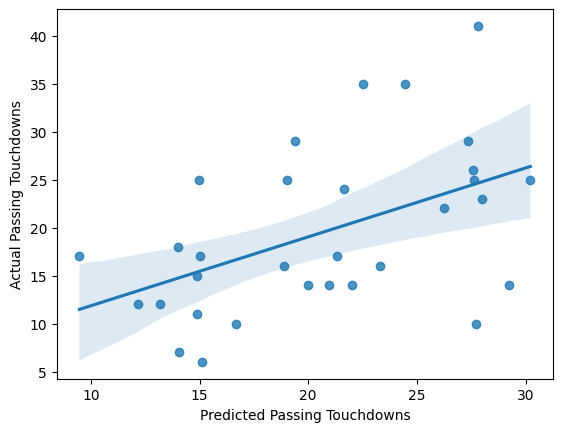

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = preds, y = Test_Y)
plt.xlabel("Predicted Passing Touchdowns")
plt.ylabel("Actual Passing Touchdowns")
plt.show()

In [45]:
k = 1
result = []
for i in range(50):
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    top_feature_indices = selector.get_support(indices=True)
    top_feature_names = X.columns[top_feature_indices]
    #print("Top", 15, "features:")
    featurelist = []
    for feature, score in zip(top_feature_names, selector.scores_[top_feature_indices]):
        #print(feature, ":", score)
        
        featurelist.append(feature)
    TrainX = X[featurelist]
    GBReg = GradientBoostingRegressor()  #BEST DEFAULT = 51.39 #For GBB 16 features is the best with a mse of 50.95058836988371
    GBReg.fit(TrainX,y)
    Actual_Test_X = Test_X[featurelist]
    preds = GBReg.predict(Actual_Test_X)
    mse = mean_squared_error(Test_Y, preds)
    instance = [mse,i+1]
    result.append(instance)
    k+=1

In [46]:
result

[[62.472872538661946, 1],
 [80.70757045525202, 2],
 [71.48423866636591, 3],
 [76.1189159800171, 4],
 [66.81713290608998, 5],
 [55.6800900756422, 6],
 [63.47898244381275, 7],
 [71.39969503633831, 8],
 [63.20997150001826, 9],
 [56.61646422620171, 10],
 [50.29615947430012, 11],
 [54.11925820945409, 12],
 [60.580023459802725, 13],
 [50.899017841576324, 14],
 [48.398977079686816, 15],
 [49.85387949597688, 16],
 [48.758037427448265, 17],
 [51.25621190574238, 18],
 [54.174505747295115, 19],
 [55.93057450177856, 20],
 [51.95148266321866, 21],
 [47.08030737973473, 22],
 [48.716464958614026, 23],
 [46.11600099639092, 24],
 [46.65609767080188, 25],
 [45.179083994580466, 26],
 [45.21762368837157, 27],
 [48.05620070537132, 28],
 [54.4421572807102, 29],
 [54.07476709886978, 30],
 [54.06988402725203, 31],
 [55.035997177159196, 32],
 [53.00010647618272, 33],
 [52.9640587994658, 34],
 [54.174116788384865, 35],
 [53.34176325599952, 36],
 [53.47928081720049, 37],
 [53.404453115928256, 38],
 [53.997015255

In [47]:
#running this again but with 1999-2021 data instead of 2008-2021
from sklearn.metrics import r2_score
k = 1
result = []
for i in range(50):
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    top_feature_indices = selector.get_support(indices=True)
    top_feature_names = X.columns[top_feature_indices]
    #print("Top", 15, "features:")
    featurelist = []
    for feature, score in zip(top_feature_names, selector.scores_[top_feature_indices]):
        #print(feature, ":", score)
        
        featurelist.append(feature)
    TrainX = X[featurelist]
    GBReg = GradientBoostingRegressor()  #BEST DEFAULT = 51.39 #For GBB 16 features is the best with a mse of 50.95058836988371
    GBReg.fit(TrainX,y)                  #BETTER 1999- 2021 with 27 Features gives 44.8157089249926, 27
    Actual_Test_X = Test_X[featurelist]
    preds = GBReg.predict(Actual_Test_X)
    mse = mean_squared_error(Test_Y, preds)
    r_squared = r2_score(Test_Y, preds)
    instance = [mse,i+1,r_squared]
    result.append(instance)
    k+=1
result

[[62.472872538661946, 1, 0.12595459891605343],
 [80.70757045525202, 2, -0.12916339400619004],
 [70.25273170196165, 3, 0.017108153307926588],
 [76.02668090504986, 4, -0.06367400928477895],
 [67.37909193246516, 5, 0.057312669649734915],
 [56.50054318537542, 6, 0.2095122583108291],
 [64.82753990549423, 7, 0.09301092113353204],
 [72.42008004319469, 8, -0.013214781643228646],
 [62.571419624871496, 9, 0.1245758464433161],
 [56.21575197656358, 10, 0.21349671486318433],
 [50.44044541147107, 11, 0.2942978680348286],
 [54.20771415944858, 12, 0.24159076829679016],
 [59.79940292021021, 13, 0.16335857491378392],
 [51.81869097293057, 14, 0.2750151114461584],
 [49.320162766598365, 15, 0.30997151731450867],
 [49.37139603369674, 16, 0.30925472297369905],
 [50.11876961611262, 17, 0.2987983694228362],
 [50.1979155715911, 18, 0.2976910542700465],
 [53.863683497785104, 19, 0.24640403212538609],
 [57.080689288202684, 20, 0.20139555080999916],
 [51.574410155556514, 21, 0.278432795255506],
 [47.95759119975852

In [48]:
#K Neighbors Regression
KNReg = KNeighborsRegressor() 
KNReg.fit(TrainX,y)
preds = KNReg.predict(Actual_Test_X)
mse = mean_squared_error(Test_Y, preds)
mse

70.88774193548386

In [49]:
#MLP Regression
MLPReg = MLPRegressor()
MLPReg.fit(TrainX,y)
preds = MLPReg.predict(Actual_Test_X)
mse = mean_squared_error(Test_Y, preds)
mse

65.98687892423098